# Current speed vs obs

In [1]:
%matplotlib inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
import cartopy
import cartopy.crs as ccrs
import pandas as pd
import copy
import math

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

netcdf_index loaded.


/home/157/amh157/.local/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
cc.start_cluster()

If the link to the dashboard below doesn't work, run this command on a local terminal to set up a SSH tunnel:

  ssh -N -L 36153:127.0.0.1:36153 vdi-n1.nci.org.au -l amh157


Client Scheduler: tcp://127.0.0.1:43906 Dashboard: http://127.0.0.1:36153/status,Cluster Workers: 4 Cores: 8 Memory: 24.00 GB


In [3]:
from joblib import Memory
memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

In [4]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
#     plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

In [5]:
cc.build_index()


Indexed 7913 variables found in new files
Saving results in database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db... 


ResourceClosedError: This Connection is closed

In [6]:
obs_file = xr.open_dataset('/g/data3/hh5/tmp/cosima/observations/original/drifter_annualmeans.nc').rename({'Lat':'latitude','Lon':'longitude'})
obs_u = obs_file['U']
obs_v = obs_file['V']
# obs_lat = obs_file['latitude']
# obs_lon = obs_file['longitude']
obs_speed = np.sqrt(obs_u**2+obs_v**2)
# obs_speed = np.swapaxes(obs_speed,0,1)
del(obs_u, obs_v)

In [7]:
# location coords: [ minlon, maxlon, minlat, maxlat ]
# key names are used as filenames so should not have spaces
locations = { 
#               'EAC_ACC_SouthPacific': [140-360,240-360,-65,-20], 
#               'EAC_ACC':             [140-360,190-360,-65,-20],
              'EAC':                     [145-360,175-360,-45,-20],
              'Kuroshio':                [125-360,155-360,25,50],
              'GulfStream':             [-85,-50,25,50],
              'Agulhas':                 [10,40,-45,-20]
    # TODO: ACC
}

In [8]:
# load model speed climatologies and snapshots
speeds = copy.deepcopy(exptdata.exptdict)  # this will store speed fields under the same keys as exptdata.exptdict
for ekey in speeds.keys():
        expt = speeds[ekey]['expt']
        n_files = speeds[ekey]['n_files']
        time_units = speeds[ekey]['time_units']
        offset = speeds[ekey]['offset']
        print(ekey, n_files)

        ## Load zonal velocity from expt
        tmp = cc.get_nc_variable(expt, 'ocean.nc', 'u',n=n_files,time_units=time_units, offset=offset)
        u = tmp.isel(st_ocean=0).sel(time=slice(pd.datetime(1998,1,1),None)).mean('time')
        u_snap = tmp.isel(st_ocean=0).isel(time=-1)

        ## Load meridional velocity from expt 
        tmp = cc.get_nc_variable(expt, 'ocean.nc', 'v',n=n_files,time_units=time_units, offset=offset)
        v = tmp.isel(st_ocean=0).sel(time=slice(pd.datetime(1998,1,1),None)).mean('time')
        v_snap = tmp.isel(st_ocean=0).isel(time=-1)
        
        speeds[ekey]['speed'] = np.sqrt(u**2+v**2)
        speeds[ekey]['speed_snap'] = np.sqrt(u_snap**2+v_snap**2)
        
        del(tmp, u, v)

1deg -12
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


ERROR:sqlalchemy.pool.StaticPool:Exception during reset or similar
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/site-packages/sqlalchemy/pool.py", line 709, in _finalize_fairy
    fairy._reset(pool)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/site-packages/sqlalchemy/pool.py", line 880, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/site-packages/sqlalchemy/engine/default.py", line 459, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140042637084416 and this is thread id 140041012459264.
ERROR:sqlalchemy.pool.StaticPool:Exception closing connection <sqlite3.Connection object at 0x7f5dd75b42d0>
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


ERROR:sqlalchemy.pool.StaticPool:Exception during reset or similar
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/site-packages/sqlalchemy/pool.py", line 709, in _finalize_fairy
    fairy._reset(pool)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/site-packages/sqlalchemy/pool.py", line 880, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/site-packages/sqlalchemy/engine/default.py", line 459, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140042637084416 and this is thread id 140041012459264.
ERROR:sqlalchemy.pool.StaticPool:Exception closing connection <sqlite3.Connection object at 0x7f5dd05502d0>
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs

025deg -30
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


ERROR:sqlalchemy.pool.StaticPool:Exception during reset or similar
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/site-packages/sqlalchemy/pool.py", line 709, in _finalize_fairy
    fairy._reset(pool)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/site-packages/sqlalchemy/pool.py", line 880, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/site-packages/sqlalchemy/engine/default.py", line 459, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140042637084416 and this is thread id 140041012459264.
ERROR:sqlalchemy.pool.StaticPool:Exception closing connection <sqlite3.Connection object at 0x7f5dd0398490>
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


ERROR:sqlalchemy.pool.StaticPool:Exception during reset or similar
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/site-packages/sqlalchemy/pool.py", line 709, in _finalize_fairy
    fairy._reset(pool)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/site-packages/sqlalchemy/pool.py", line 880, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/site-packages/sqlalchemy/engine/default.py", line 459, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140042637084416 and this is thread id 140041012459264.
ERROR:sqlalchemy.pool.StaticPool:Exception closing connection <sqlite3.Connection object at 0x7f5e1134e570>
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs

01deg None
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
ERROR:sqlalchemy.pool.StaticPool:Exception during reset or similar
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/site-packages/sqlalchemy/pool.py", line 709, in _finalize_fairy
    fairy._reset(pool)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/site-packages/sqlalchemy/pool.py", line 880, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/site-packages/sqlalchemy/engine/default.py", line 459, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140042637084416 and this is thread id 140041012459264.
ERROR:sqlalchemy.pool.StaticPool:Exception closing connection <sqlite3.Connection objec

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


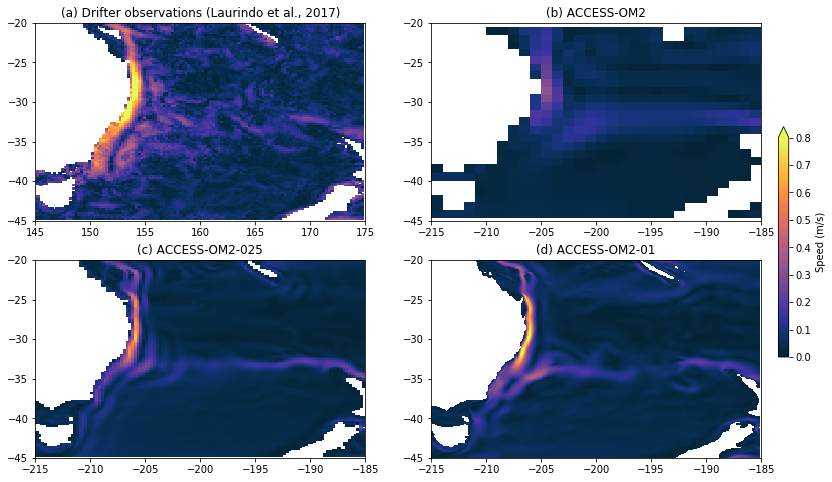

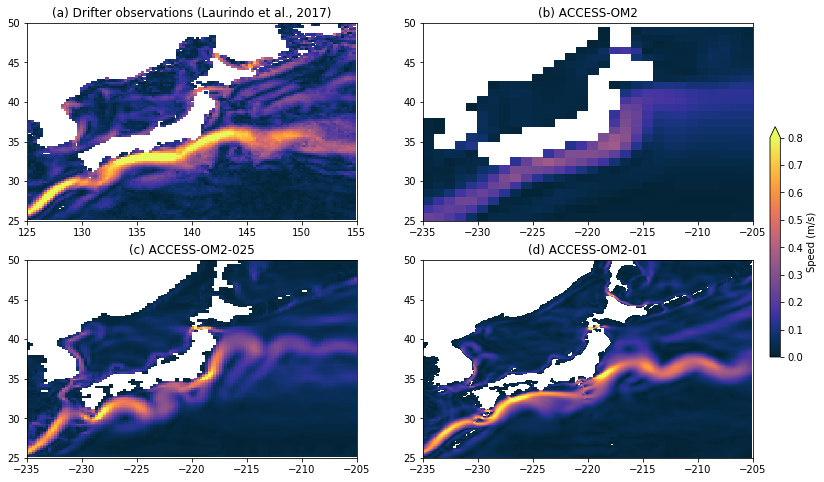

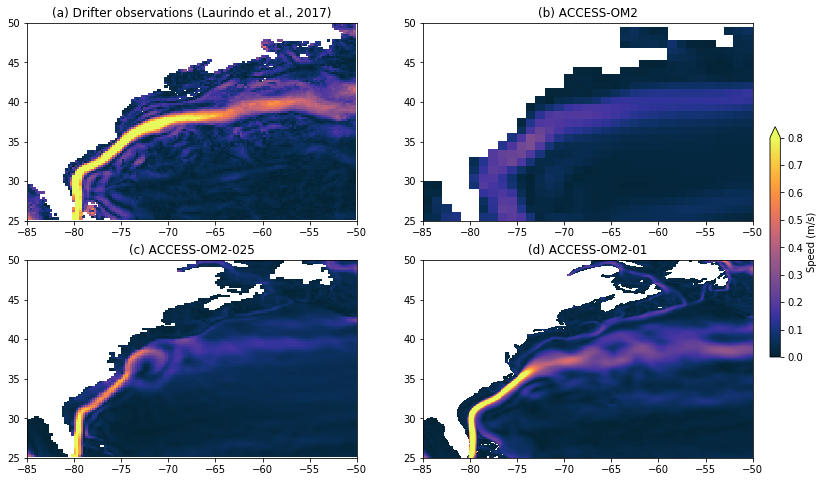

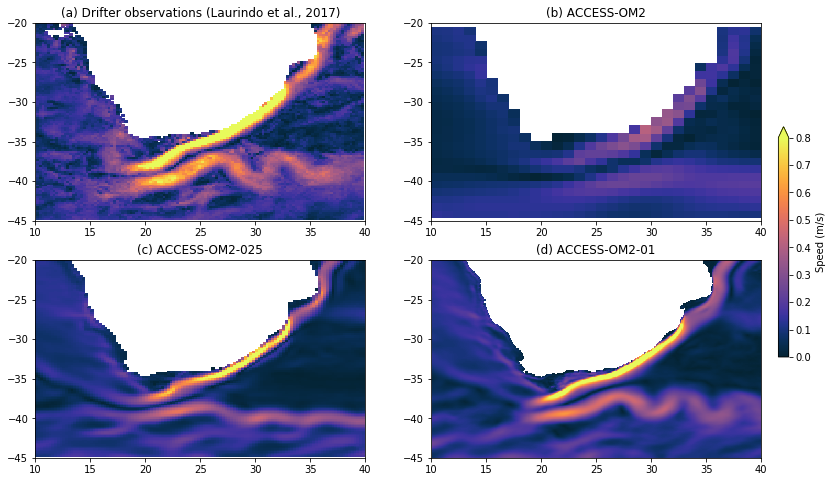

In [9]:
# plot obs and all model mean speeds in each location
vmax = 0.8
ncols = 2
nrows = math.ceil((len(speeds)+1)/ncols)
for locname,loc in locations.items():
    fig = plt.figure(figsize=(12,8))
    #fig.suptitle('Observed surface current climatology and '+str(clim_years)+'-year model mean', fontsize=14)
    oloc = copy.copy(loc)
    # BUG: this probably won't work for regions that straddle 180E
    if oloc[0]<-180:
        oloc[0] = oloc[0]+360
    if oloc[1]<-180:
        oloc[1] = oloc[1]+360
    obs_speed_loc = obs_speed.sel(latitude=slice(oloc[2],oloc[3])).sel(longitude=slice(oloc[0],oloc[1]))
    ax = fig.add_subplot(ncols, nrows, 1)
    cax = ax.pcolormesh(obs_speed_loc.longitude, obs_speed_loc.latitude, np.swapaxes(obs_speed_loc,0,1), 
                        shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=vmax)
    plt.title('(a) Drifter observations (Laurindo et al., 2017)')
    plt.xlim(oloc[0],oloc[1])
    plt.ylim(oloc[2],oloc[3])

    for i, ekey in enumerate(speeds.keys()):
        ax = fig.add_subplot(ncols, nrows, i+2)
        speed = speeds[ekey]['speed'].sel(yu_ocean=slice(loc[2],loc[3])).sel(xu_ocean=slice(loc[0],loc[1]))
        cax = ax.pcolormesh(speed.xu_ocean, speed.yu_ocean, speed, 
                            shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=vmax)
        plt.title(speeds[ekey]['desc'], fontsize=12)
        plt.xlim(loc[0],loc[1])
        plt.ylim(loc[2],loc[3])
        
    plt.subplot(222)
    plt.title('(b) ACCESS-OM2')
    plt.subplot(223)
    plt.title('(c) ACCESS-OM2-025')
    plt.subplot(224)
    plt.title('(d) ACCESS-OM2-01')
    
    plt.subplots_adjust(left=0.08,right=0.92)
    ax1 = plt.axes([0.94,0.3,0.012,0.4])
    cb = plt.colorbar(cax,cax=ax1,orientation='vertical',extend='max')
    cb.ax.set_ylabel('Speed (m/s)')
    savefigure(locname+'_clim')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


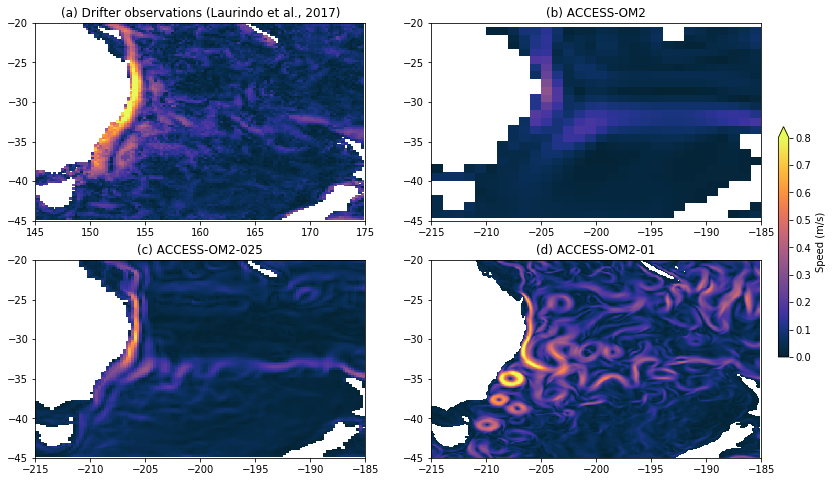

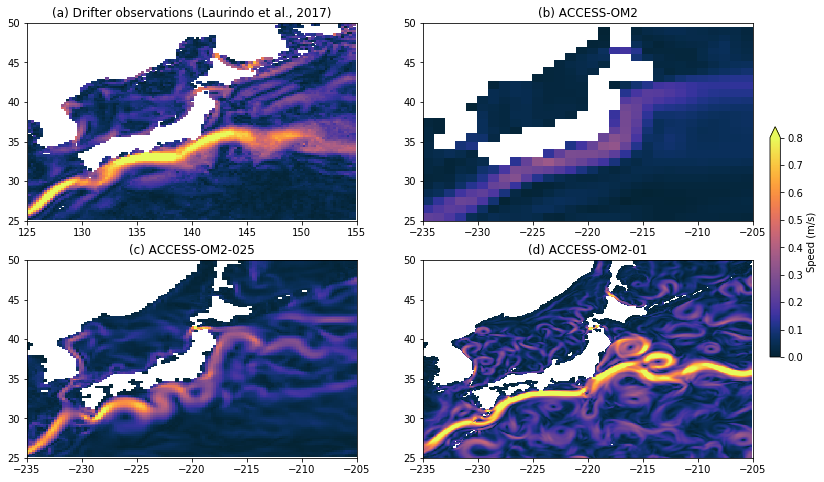

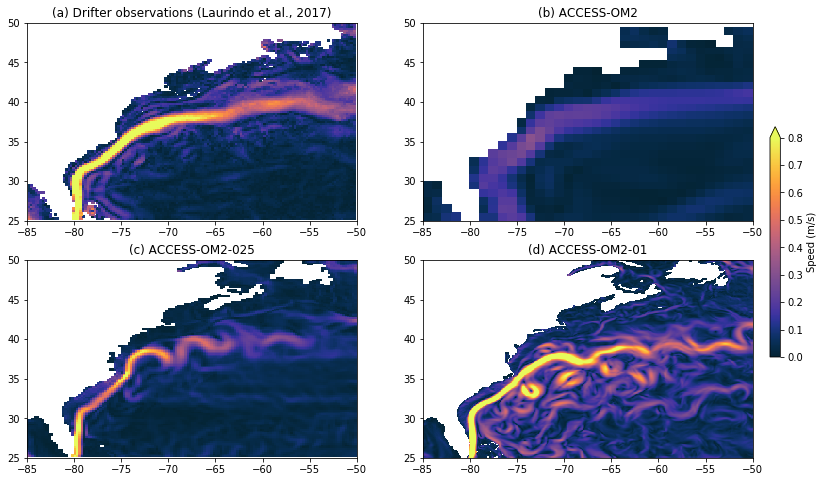

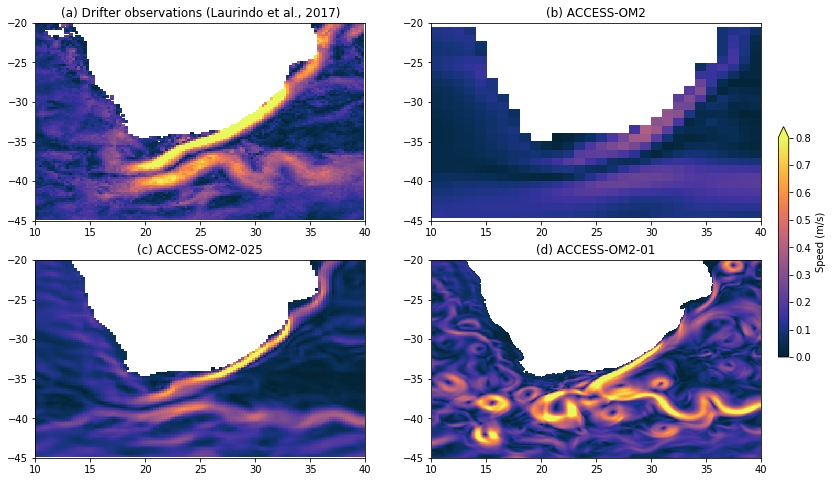

In [10]:
# plot obs and all model snapshot speeds in each location

# TODO: get 1-day snapshots from ice?

vmax = 0.8
ncols = 2
nrows = math.ceil((len(speeds)+1)/ncols)
for locname,loc in locations.items():
    fig = plt.figure(figsize=(12,8))
    #fig.suptitle('Observed surface current climatology and model snapshots - TODO: get 1-day snapshots from ice', fontsize=14)
    oloc = copy.copy(loc)
    # BUG: this probably won't work for regions that straddle 180E
    if oloc[0]<-180:
        oloc[0] = oloc[0]+360
    if oloc[1]<-180:
        oloc[1] = oloc[1]+360
    obs_speed_loc = obs_speed.sel(latitude=slice(oloc[2],oloc[3])).sel(longitude=slice(oloc[0],oloc[1]))
    ax = fig.add_subplot(ncols, nrows, 1)
    cax = ax.pcolormesh(obs_speed_loc.longitude, obs_speed_loc.latitude, np.swapaxes(obs_speed_loc,0,1), 
                        shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=vmax)
    plt.title('(a) Drifter observations (Laurindo et al., 2017)', fontsize=12)
    plt.xlim(oloc[0],oloc[1])
    plt.ylim(oloc[2],oloc[3])
    #fig.colorbar(cax,shrink=0.8,label='Speed (m/s)',extend='max')

    for i, ekey in enumerate(speeds.keys()):
        ax = fig.add_subplot(ncols, nrows, i+2)
        speed = speeds[ekey]['speed_snap'].sel(yu_ocean=slice(loc[2],loc[3])).sel(xu_ocean=slice(loc[0],loc[1]))
        cax = ax.pcolormesh(speed.xu_ocean, speed.yu_ocean, speed, 
                            shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=vmax)
        plt.title(speeds[ekey]['desc'], fontsize=12)
        plt.xlim(loc[0],loc[1])
        plt.ylim(loc[2],loc[3])
        
    plt.subplot(222)
    plt.title('(b) ACCESS-OM2')
    plt.subplot(223)
    plt.title('(c) ACCESS-OM2-025')
    plt.subplot(224)
    plt.title('(d) ACCESS-OM2-01')
    
    plt.subplots_adjust(left=0.08,right=0.92)
    ax1 = plt.axes([0.94,0.3,0.012,0.4])
    cb = plt.colorbar(cax,cax=ax1,orientation='vertical',extend='max')
    cb.ax.set_ylabel('Speed (m/s)')
    
    savefigure(locname+'_snap')